In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

# Load the data
college_type_df = pd.read_csv('sample_data/salaries-by-college-type.csv')
region_df = pd.read_csv('sample_data/salaries-by-region.csv')
degrees_df = pd.read_csv('sample_data/degrees-that-pay-back.csv')

# Convert salary columns to numeric values
def convert_salary_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True))

salary_columns = [
    'Mid-Career Median Salary',
    'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
    'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary'
]
convert_salary_to_numeric(college_type_df, salary_columns)
convert_salary_to_numeric(region_df, salary_columns)
convert_salary_to_numeric(degrees_df, ['Mid-Career Median Salary'])

# Artificial assumption: All majors are available at all schools
expanded_school_data = pd.concat([college_type_df.loc[college_type_df.index.repeat(degrees_df.shape[0])].reset_index(drop=True),
                                  degrees_df.loc[degrees_df.index.repeat(college_type_df.shape[0])].reset_index(drop=True)], axis=1)

# Merge with region data
combined_df = pd.merge(expanded_school_data, region_df, on='School Name', suffixes=('', '_region'))

# Drop redundant columns
columns_to_drop = ['Starting Median Salary', 'Starting Median Salary_region']
combined_cleaned_df = combined_df.drop(columns=columns_to_drop)

# Prepare data for modeling
features = ['School Name', 'School Type', 'Region', 'Undergraduate Major']
target = 'Mid-Career Median Salary'
model_data = combined_cleaned_df[features + [target]]

# Encode categorical variables
encoder_school_name = LabelEncoder()
encoder_school_type = LabelEncoder()
encoder_region = LabelEncoder()
encoder_major = LabelEncoder()

model_data.loc[:, 'School Name'] = encoder_school_name.fit_transform(model_data['School Name'])
model_data.loc[:, 'School Type'] = encoder_school_type.fit_transform(model_data['School Type'])
model_data.loc[:, 'Region'] = encoder_region.fit_transform(model_data['Region'])
model_data.loc[:, 'Undergraduate Major'] = encoder_major.fit_transform(model_data['Undergraduate Major'])

# Split the data into training and testing sets
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate the mean absolute error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

# Function to predict mid-career median salary based on user input
def predict_salary(school_name, school_type, region, major):
    encoded_school_name = encoder_school_name.transform([school_name])[0]
    encoded_school_type = encoder_school_type.transform([school_type])[0]
    encoded_region = encoder_region.transform([region])[0]
    encoded_major = encoder_major.transform([major])[0]

    # Make prediction
    features = [encoded_school_name, encoded_school_type, encoded_region, encoded_major]
    predicted_salary = model.predict([features])[0]  # Access the first element if predicting multiple
    # Ensure the output is a single value and format the result
    if isinstance(predicted_salary, np.ndarray):
        predicted_salary = predicted_salary[0]  # In case of multiple outputs, take the first one
    return f"Predicted Mid-Career Median Salary: ${predicted_salary:.2f}"

# Example of using the function
print(predict_salary("Harvey Mudd College", "Engineering", "California", "Computer Science"))


Mean Absolute Error: $1.26
Predicted Mid-Career Median Salary: $107846.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load the data
college_type_df = pd.read_csv('sample_data/salaries-by-college-type.csv')
region_df = pd.read_csv('sample_data/salaries-by-region.csv')
degrees_df = pd.read_csv('sample_data/degrees-that-pay-back.csv')

In [ ]:
# Convert salary columns to numeric values
def convert_salary_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True))

salary_columns = [
    'Mid-Career Median Salary',
    'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
    'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary'
]
convert_salary_to_numeric(college_type_df, salary_columns)
convert_salary_to_numeric(region_df, salary_columns)
convert_salary_to_numeric(degrees_df, ['Mid-Career Median Salary'])

In [ ]:
# Artificial assumption: All majors are available at all schools
expanded_school_data = pd.concat([college_type_df.loc[college_type_df.index.repeat(degrees_df.shape[0])].reset_index(drop=True),
                                  degrees_df.loc[degrees_df.index.repeat(college_type_df.shape[0])].reset_index(drop=True)], axis=1)

# Merge with region data
combined_df = pd.merge(expanded_school_data, region_df, on='School Name', suffixes=('', '_region'))

# Drop redundant columns
columns_to_drop = ['Starting Median Salary', 'Starting Median Salary_region']
combined_cleaned_df = combined_df.drop(columns=columns_to_drop)

# Prepare data for modeling
features = ['School Name', 'School Type', 'Region', 'Undergraduate Major']
target = 'Mid-Career Median Salary'
model_data = combined_cleaned_df[features + [target]]

In [ ]:
# Encode categorical variables
encoder_school_name = LabelEncoder()
encoder_school_type = LabelEncoder()
encoder_region = LabelEncoder()
encoder_major = LabelEncoder()

model_data.loc[:, 'School Name'] = encoder_school_name.fit_transform(model_data['School Name'])
model_data.loc[:, 'School Type'] = encoder_school_type.fit_transform(model_data['School Type'])
model_data.loc[:, 'Region'] = encoder_region.fit_transform(model_data['Region'])
model_data.loc[:, 'Undergraduate Major'] = encoder_major.fit_transform(model_data['Undergraduate Major'])

# Split the data into training and testing sets
X = model_data[features]
y = model_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Calculate the mean absolute error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $1.26


In [ ]:
# Function to predict mid-career median salary based on user input
def predict_salary(school_name, school_type, region, major):
    encoded_school_name = encoder_school_name.transform([school_name])[0]
    encoded_school_type = encoder_school_type.transform([school_type])[0]
    encoded_region = encoder_region.transform([region])[0]
    encoded_major = encoder_major.transform([major])[0]

    # Make prediction
    features = [encoded_school_name, encoded_school_type, encoded_region, encoded_major]
    predicted_salary = model.predict([features])[0]  # Access the first element if predicting multiple
    # Ensure the output is a single value and format the result
    if isinstance(predicted_salary, np.ndarray):
        predicted_salary = predicted_salary[0]  # In case of multiple outputs, take the first one
    return f"Predicted Mid-Career Median Salary: ${predicted_salary:.2f}"


# Using the model to generate predictions
print(predict_salary("East Carolina University (ECU)", "State", "Southern", "Computer Science"))

Predicted Mid-Career Median Salary: $84788.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


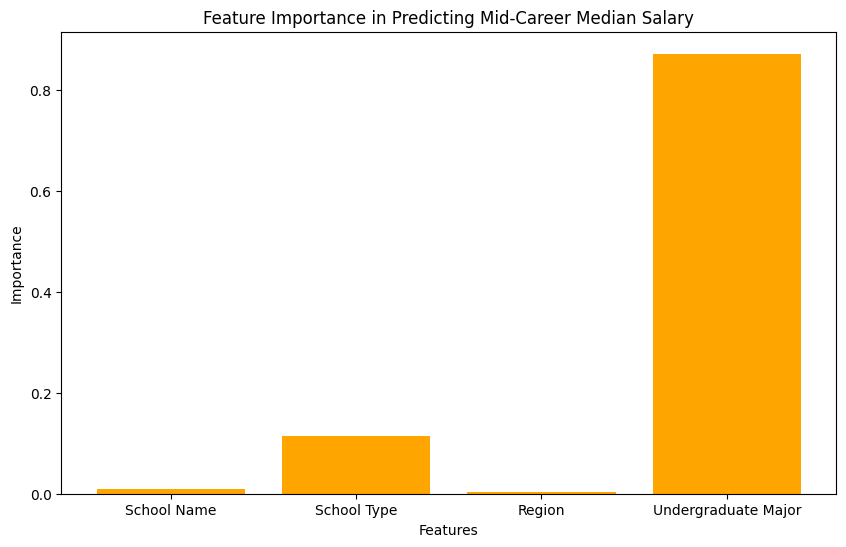

In [ ]:
#
import matplotlib.pyplot as plt

# Feature importance from the RandomForest model
feature_importance = model.feature_importances_
features = ['School Name', 'School Type', 'Region', 'Undergraduate Major']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Predicting Mid-Career Median Salary')
plt.show()


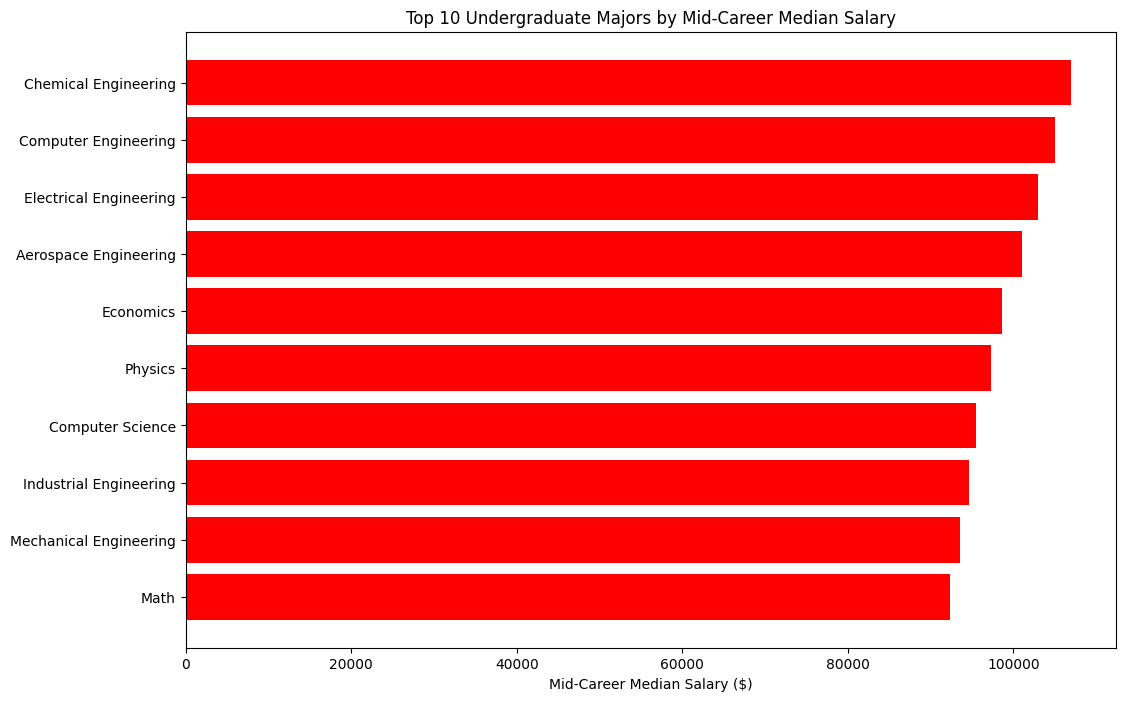

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'degrees_df' is your DataFrame containing undergraduate major and salary information
# First, convert salary columns to numeric if not already done
degrees_df['Mid-Career Median Salary'] = pd.to_numeric(degrees_df['Mid-Career Median Salary'].replace('[\$,]', '', regex=True))

# Sort the DataFrame by mid-career median salary in descending order
sorted_degrees = degrees_df.sort_values(by='Mid-Career Median Salary', ascending=False)

# Select the top N majors for visualization, here N=10
top_degrees = sorted_degrees.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_degrees['Undergraduate Major'], top_degrees['Mid-Career Median Salary'], color='red')
plt.xlabel('Mid-Career Median Salary ($)')
plt.title('Top 10 Undergraduate Majors by Mid-Career Median Salary')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest salaries at the top
plt.show()


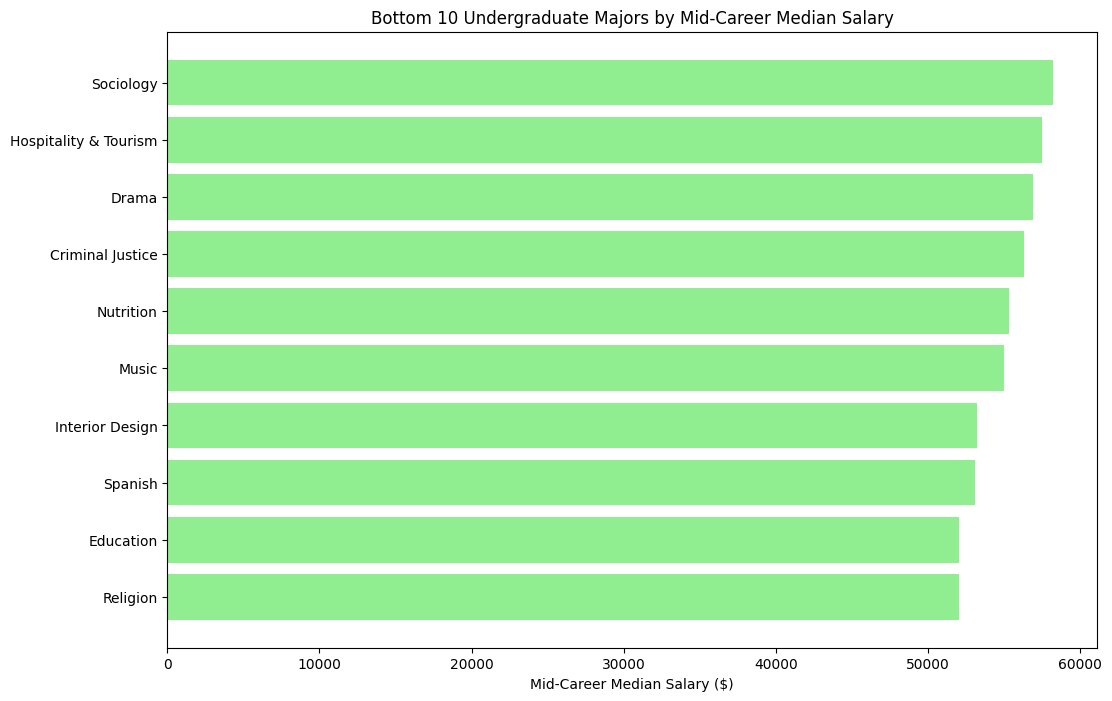

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'degrees_df' is your DataFrame containing undergraduate major and salary information
# First, convert salary columns to numeric if not already done
degrees_df['Mid-Career Median Salary'] = pd.to_numeric(degrees_df['Mid-Career Median Salary'].replace('[\$,]', '', regex=True))

# Sort the DataFrame by mid-career median salary in descending order
sorted_degrees = degrees_df.sort_values(by='Mid-Career Median Salary', ascending=False)

# Select the top N majors for visualization, here N=10
top_degrees = sorted_degrees.tail(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_degrees['Undergraduate Major'], top_degrees['Mid-Career Median Salary'], color='lightgreen')
plt.xlabel('Mid-Career Median Salary ($)')
plt.title('Bottom 10 Undergraduate Majors by Mid-Career Median Salary')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest salaries at the top
plt.show()


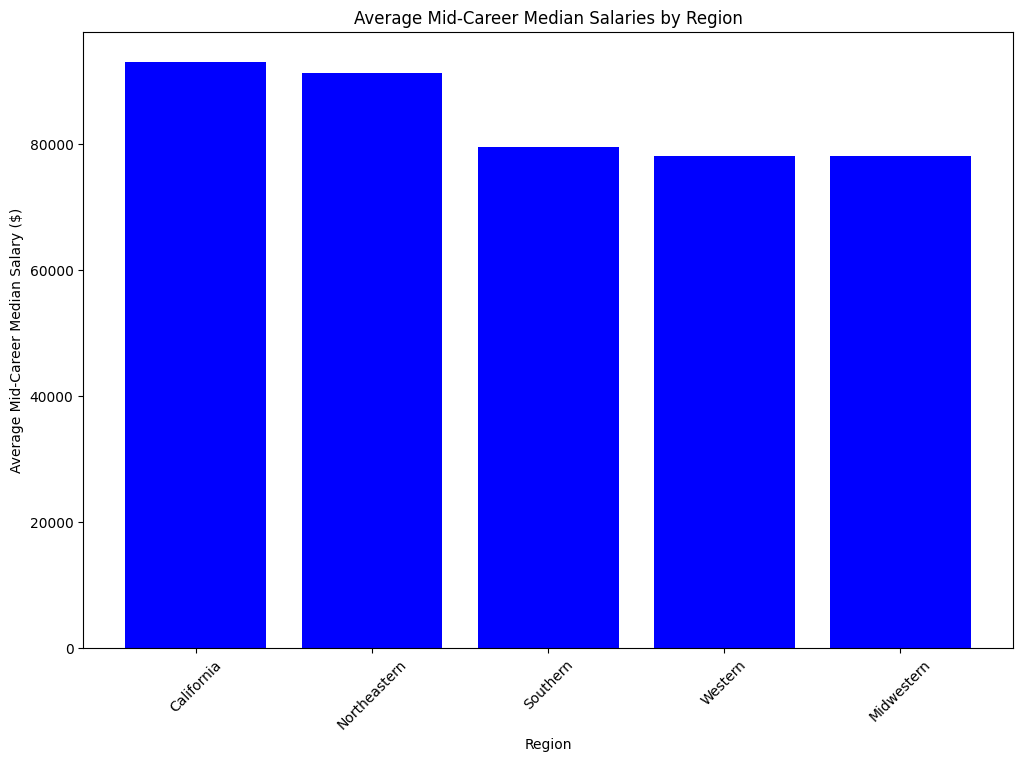

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'region_df' is your DataFrame containing region and salary information
# Ensure salary columns have been converted to numeric as per your previous code block

# Calculate the average mid-career median salary for each region
average_salaries = region_df.groupby('Region')['Mid-Career Median Salary'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(average_salaries.index, average_salaries, color='blue')
plt.xlabel('Region')
plt.ylabel('Average Mid-Career Median Salary ($)')
plt.title('Average Mid-Career Median Salaries by Region')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


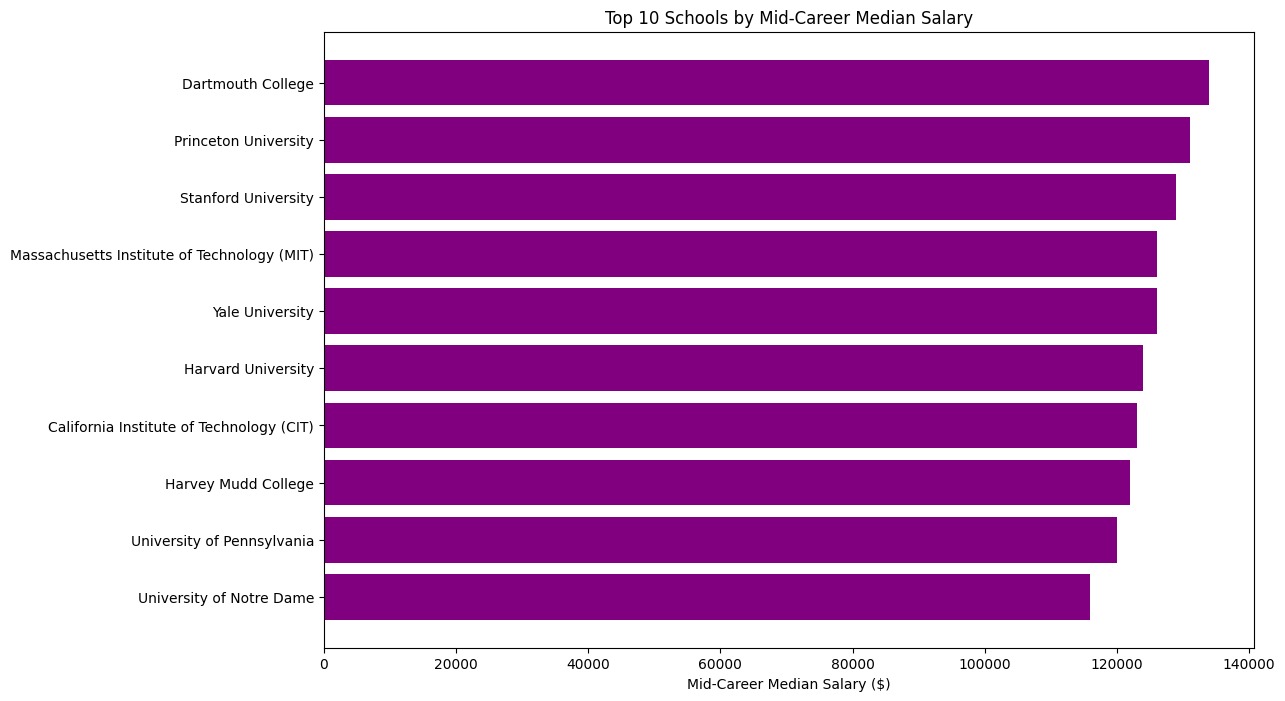

In [ ]:
import matplotlib.pyplot as plt

target_field = 'Mid-Career Median Salary'

# Assuming 'combined_cleaned_df' is your DataFrame that includes school and salary information
# Sort the DataFrame by 'Mid-Career Median Salary' in descending order
sorted_schools = region_df.sort_values(by=target_field, ascending=False)

# Select the top 10 schools for visualization
top_schools = sorted_schools.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_schools['School Name'], top_schools[target_field], color='purple')
plt.xlabel('Mid-Career Median Salary ($)')
plt.title('Top 10 Schools by Mid-Career Median Salary')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest salary at the top
plt.show()


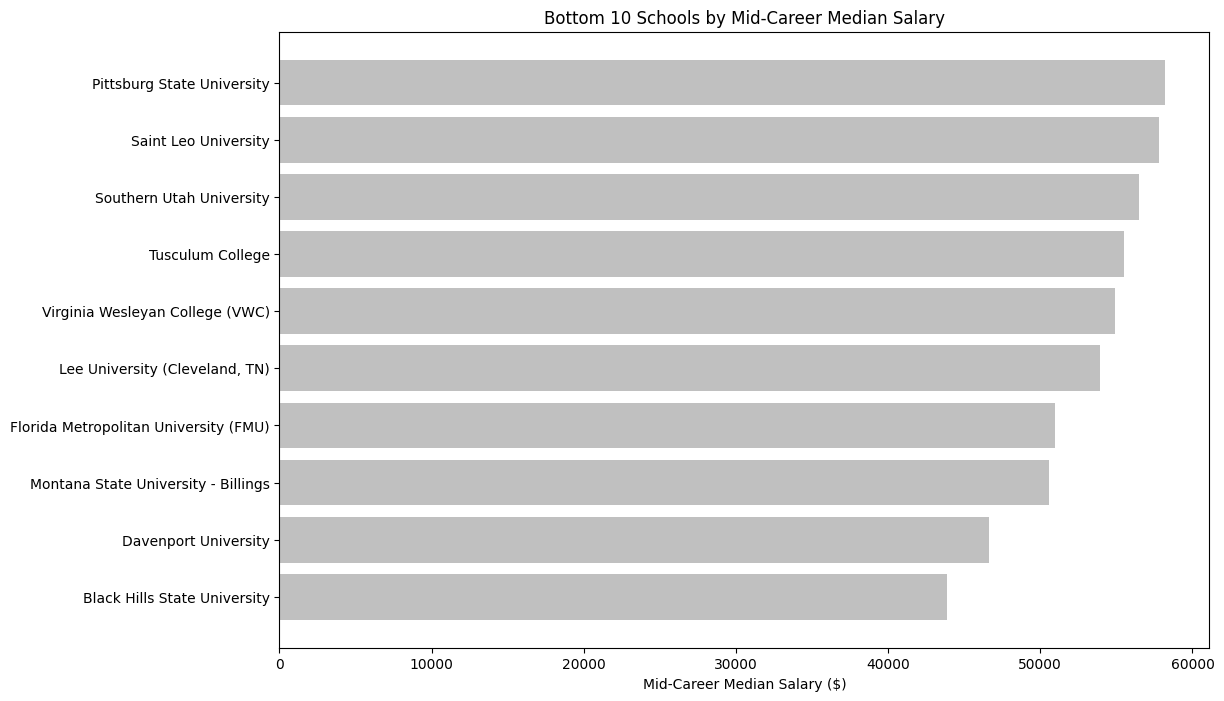

In [ ]:
import matplotlib.pyplot as plt

target_field = 'Mid-Career Median Salary'

# Assuming 'combined_cleaned_df' is your DataFrame that includes school and salary information
# Sort the DataFrame by 'Mid-Career Median Salary' in descending order
sorted_schools = region_df.sort_values(by=target_field, ascending=False)

# Select the top 10 schools for visualization
top_schools = sorted_schools.tail(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_schools['School Name'], top_schools[target_field], color='silver')
plt.xlabel('Mid-Career Median Salary ($)')
plt.title('Bottom 10 Schools by Mid-Career Median Salary')
plt.gca().invert_yaxis()  # Invert y-axis to have the school with the highest salary at the top
plt.show()


<ipython-input-105-d076a7e9660f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_schools['remainder'] = max_value - top_schools['Starting Median Salary']


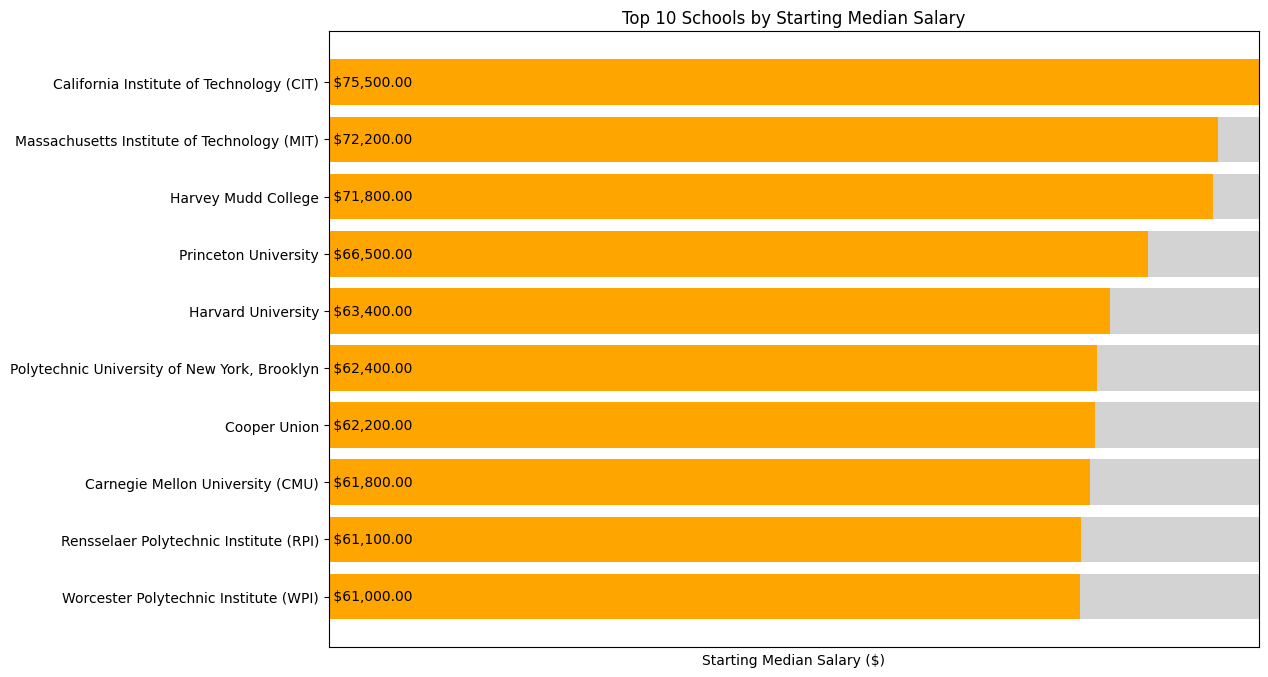

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert salary columns to numeric values
def convert_salary_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True))

# Convert the 'Mid-Career Median Salary' column to numeric
convert_salary_to_numeric(college_type_df, 'Starting Median Salary')

# Now, sort the DataFrame by 'Mid-Career Median Salary' in descending order
sorted_schools = college_type_df.sort_values(by='Starting Median Salary', ascending=False)

# Select the top 10 schools for visualization
top_schools = sorted_schools.head(10)

# Determine a maximum value to represent 100% (you could choose a round number or the max salary as 100%)
max_value = top_schools['Starting Median Salary'].max()

# Calculate the remainder of the bar that needs to be filled
top_schools['remainder'] = max_value - top_schools['Starting Median Salary']

# Create a bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(top_schools['School Name'], top_schools['remainder'], color='lightgrey', edgecolor='none')
plt.barh(top_schools['School Name'], top_schools['Starting Median Salary'], left=top_schools['remainder'], color='orange', edgecolor='none')
plt.xlabel('Starting Median Salary ($)')

plt.title('Top 10 Schools by Starting Median Salary')
plt.gca().invert_yaxis()

# Add the salary value next to the right side of each bar (this is the visible bar)
for i, (value, remainder) in enumerate(zip(top_schools['Starting Median Salary'], top_schools['remainder'])):
    plt.text(
        max_value,  # The fixed position at the end of the bars
        i,          # The y position of the bar
        f' ${value:,.2f}',  # The label
        va='center',        # Center alignment vertically
        ha='left',         # Right alignment horizontally
    )

# Set the x-axis limits to range from 0 to the chosen maximum value
plt.xlim(0, max_value)
plt.gca().invert_xaxis()
plt.tick_params(
    axis='x',          # Changes apply to the x-axis
    which='both',      # Both major and minor ticks are affected
    bottom=False,      # Ticks along the bottom edge are off
    top=False,         # Ticks along the top edge are off
    labelbottom=False  # Labels along the bottom edge are off
)
plt.show()


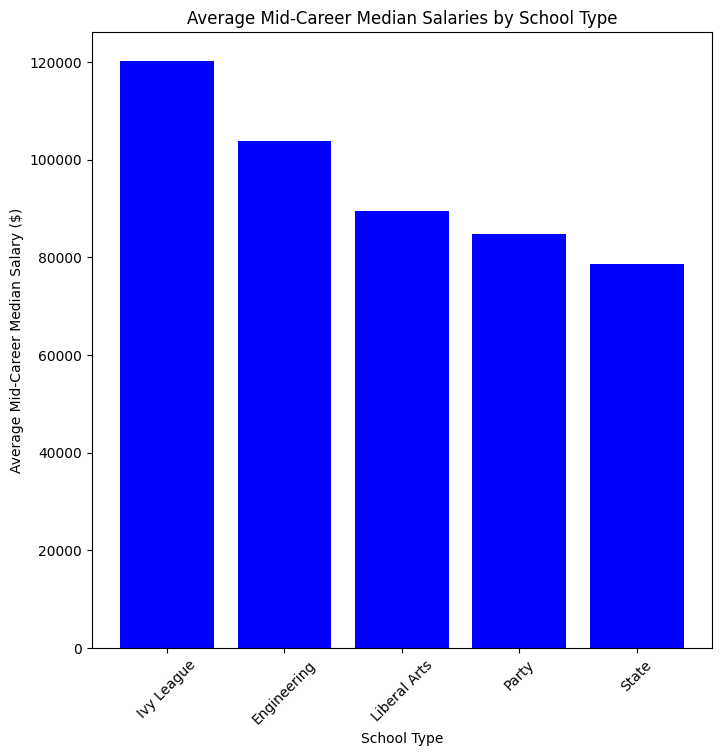

In [ ]:
# Finding the best School Types
import matplotlib.pyplot as plt

# Assuming 'region_df' is your DataFrame containing region and salary information
# Ensure salary columns have been converted to numeric as per your previous code block

# Calculate the average mid-career median salary for each region
average_salaries = college_type_df.groupby('School Type')['Mid-Career Median Salary'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 8))
plt.bar(average_salaries.index, average_salaries, color='blue')
plt.xlabel('School Type')
plt.ylabel('Average Mid-Career Median Salary ($)')
plt.title('Average Mid-Career Median Salaries by School Type')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()



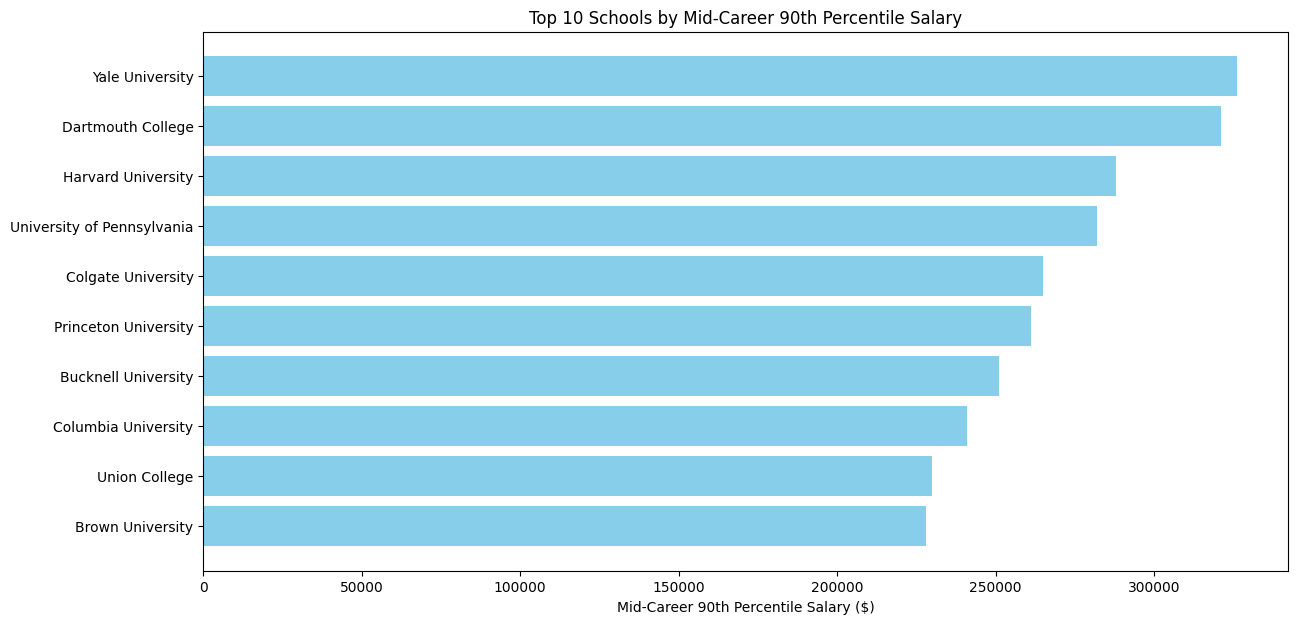

In [ ]:
# The best of the best

import matplotlib.pyplot as plt
import pandas as pd

# Assuming that 'college_type_df' is already loaded and salary columns are converted to numeric values
# Sort the DataFrame by 'Mid-Career 90th Percentile Salary' in descending order
top_schools_by_90th_percentile = college_type_df.sort_values(by='Mid-Career 90th Percentile Salary', ascending=False)

# Select the top N schools for the visualization, let's say top 10
top_schools = top_schools_by_90th_percentile.head(10)

# Create a bar chart
plt.figure(figsize=(14, 7))
plt.barh(top_schools['School Name'], top_schools['Mid-Career 90th Percentile Salary'], color='skyblue')
plt.xlabel('Mid-Career 90th Percentile Salary ($)')
plt.title('Top 10 Schools by Mid-Career 90th Percentile Salary')
plt.gca().invert_yaxis()  # This inverts the Y-axis (i.e., the schools) so the highest salaries are at the top

plt.show()

In [ ]:
# ECU Stats

# Assuming your dataframes college_type_df, region_df, and degrees_df are already loaded and processed

# Filter the rows where 'School Name' contains 'East Carolina University (ECU)'
ecu_stats_college_type = college_type_df[college_type_df['School Name'].str.contains('East Carolina University', na=False)]
ecu_stats_region = region_df[region_df['School Name'].str.contains('East Carolina University', na=False)]

# Since the school name is unique, we expect only one row per DataFrame, so we can concatenate them
# We will ignore the degrees_df as it contains degree-specific information, not school-specific
ecu_combined_stats = pd.concat([ecu_stats_college_type, ecu_stats_region]).drop_duplicates().set_index('School Name')

# Display the stats for ECU
display(ecu_combined_stats)


,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region
School Name,,,,,,,,
East Carolina University (ECU),State,40200.0,67500.0,38400.0,52000.0,98700.0,151000.0,NaN
East Carolina University (ECU),NaN,"$40,200.00",67500.0,38400.0,52000.0,98700.0,151000.0,Southern
